In [1]:
import randf_model as model
import pandas as pd
import numpy as np

In [2]:
# Example usage
audio_directory = 'TAUKADIAL-24/train/'  # Replace with your actual directory path
all_audio_features = model.process_audio_directory(audio_directory)

### Load the processed data and Ground truth data into a dataframe

In [3]:
df1 = pd.DataFrame(all_audio_features)
df1.rename(columns={0: 'tkdname', 1: 'mfccs', 2: 'chroma', 3: 'spectral_contrast', 4: 'spectral_rolloff', 5: 'zero_crossing_rate', 6: 'rmse'}, inplace=True)

df2 = pd.read_csv('TAUKADIAL-24/train/groundtruth.csv')
df2['sex'] = df2['sex'].map({'M': 1, 'F': 0})
df2.drop(columns=['mmse'], inplace=True)
df = pd.merge(df1, df2, on='tkdname')
df.to_csv('TAUKADIAL-24.csv')

In [4]:
df.head()

,tkdname,mfccs,chroma,spectral_contrast,spectral_rolloff,zero_crossing_rate,rmse,age,sex,dx
0,taukdial-109-1.wav,"[-430.41904, 130.43205, 27.022755, 36.2068, -0...","[0.53060824, 0.49707878, 0.43993297, 0.3798646...","[20.284155622319712, 15.687091974219621, 18.90...",1871.617482,0.042134,0.027124,72,1,MCI
1,taukdial-053-3.wav,"[-471.56644, 95.3816, 42.543037, 24.282658, -3...","[0.5325664, 0.44339445, 0.46366897, 0.4762177,...","[21.536564255700505, 13.138538271322721, 15.82...",2898.405117,0.061045,0.026718,73,1,MCI
2,taukdial-051-1.wav,"[-388.53183, 141.86292, 35.581978, 21.184015, ...","[0.5623833, 0.45743582, 0.37826404, 0.36843395...","[15.9616963024241, 13.506451266528362, 16.3445...",1671.243210,0.043425,0.037746,64,1,MCI
3,taukdial-014-1.wav,"[-295.61603, 90.61048, -25.255726, 37.26282, -...","[0.29368737, 0.26871374, 0.28498656, 0.3593897...","[23.46122979051979, 16.569796770530886, 19.340...",3568.824647,0.123242,0.066808,65,0,MCI
4,taukdial-032-2.wav,"[-400.74396, 86.06941, -17.47101, 24.062902, 1...","[0.46204045, 0.44497553, 0.41617158, 0.3602271...","[21.921714577214733, 15.83048484958038, 19.301...",3210.400251,0.084233,0.030681,76,1,MCI


In [5]:

data = df.copy()
data.drop(columns=['tkdname'], inplace=True)
data['mfccs'] = data['mfccs'].apply(lambda x: np.mean(x))
data['chroma'] = data['chroma'].apply(lambda x: np.mean(x))
data['spectral_contrast'] = data['spectral_contrast'].apply(lambda x: np.mean(x))

data.describe()

,mfccs,chroma,spectral_contrast,spectral_rolloff,zero_crossing_rate,rmse,age,sex
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,-22.808437,0.402030,22.946647,2684.186555,0.077263,0.045579,72.720930,0.387597
std,6.597464,0.064653,1.735153,729.883915,0.031047,0.030630,6.398644,0.487832
min,-38.629704,0.286482,19.499623,857.973233,0.014292,0.004294,61.000000,0.000000
25%,-27.004293,0.352725,21.496536,2124.505285,0.054152,0.023260,68.000000,0.000000
50%,-23.612984,0.393913,22.933794,2657.252523,0.076543,0.042473,73.000000,0.000000
75%,-19.678061,0.441153,24.342754,3203.970415,0.100321,0.063621,77.000000,1.000000
max,-4.704826,0.642019,26.970269,5595.820664,0.158170,0.258234,87.000000,1.000000


### Train the model

In [6]:
# Define features and target
features = ['mfccs', 'chroma', 'spectral_contrast', 'spectral_rolloff', 'zero_crossing_rate', 'rmse','age','sex']
target = 'dx'

# Train the model
trained_model, test_features, test_target = model.train_model(data, features, target,'model_cls.pkl')
test_features.head()

,mfccs,chroma,spectral_contrast,spectral_rolloff,zero_crossing_rate,rmse,age,sex
314,-25.492636,0.370762,23.759002,2789.045983,0.073212,0.066418,72,1
152,-24.331806,0.494358,21.133586,2039.947410,0.035091,0.008695,73,0
90,-14.356266,0.466237,20.971501,1631.799776,0.031722,0.029961,74,0
266,-22.230061,0.346927,25.349095,2765.144414,0.114241,0.064421,68,1
208,-25.341377,0.351326,24.716431,2392.257254,0.089578,0.081837,79,1


### Evaluate the model

In [7]:
# Test the model
ypred, ytest, report = model.test_model(trained_model, test_features, test_target)

Actual vs. Predicted:
NC NC
MCI MCI
MCI MCI
NC NC
MCI MCI
NC NC
MCI MCI
NC MCI
MCI MCI
NC NC
MCI NC
MCI MCI
MCI MCI
MCI MCI
MCI MCI
NC NC
MCI MCI
MCI MCI
NC NC
NC MCI
MCI MCI
NC NC
MCI NC
MCI MCI
NC NC
NC MCI
NC NC
MCI MCI
NC NC
MCI MCI
MCI MCI
MCI MCI
NC NC
MCI MCI
MCI MCI
NC MCI
MCI NC
NC NC
MCI MCI
MCI MCI
NC NC
NC NC
NC NC
NC NC
NC NC
MCI MCI
MCI MCI
MCI MCI
NC NC
NC NC
MCI MCI
NC NC
MCI MCI
NC NC
MCI MCI
NC NC
MCI MCI
MCI MCI
MCI MCI
MCI MCI
NC MCI
MCI MCI
MCI MCI
NC NC
NC MCI
NC NC
NC NC
NC NC
NC NC
MCI MCI
MCI MCI
MCI MCI
MCI MCI
MCI MCI
MCI MCI
NC MCI
MCI MCI
NC NC
Accuracy: 0.8717948717948718


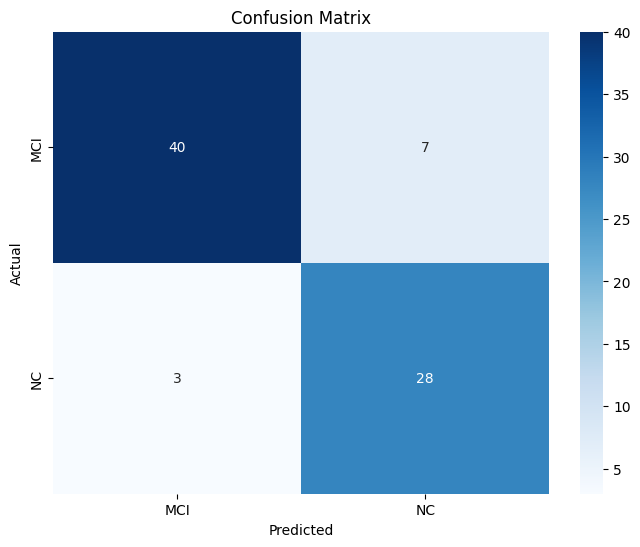

In [8]:
target_labels = ['MCI','NC']
model.plot_confusion_matrix(ytest, ypred,target_labels)

[('num', SimpleImputer(), ['mfccs', 'chroma', 'spectral_contrast', 'spectral_rolloff', 'zero_crossing_rate', 'rmse', 'age', 'sex'])]
[4 2 3 0 5 6 1 7]


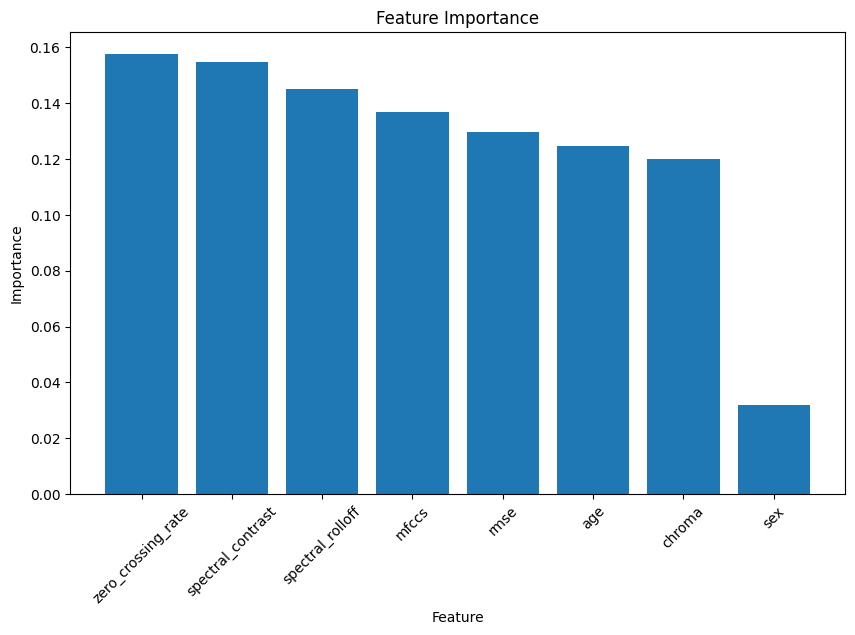

In [9]:
import matplotlib.pyplot as plt

features = ['mfccs', 'chroma', 'spectral_contrast', 'spectral_rolloff', 'zero_crossing_rate', 'rmse','age','sex']
preprocessor = trained_model.named_steps['preprocessor']
print(preprocessor.transformers_)


importances = trained_model.named_steps['classifier'].feature_importances_


indices = np.argsort(importances)[::-1]
print(indices)
plt.figure(figsize=(10, 6))
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [10]:
report

'              precision    recall  f1-score   support\n\n         MCI       0.85      0.93      0.89        43\n          NC       0.90      0.80      0.85        35\n\n    accuracy                           0.87        78\n   macro avg       0.88      0.87      0.87        78\nweighted avg       0.87      0.87      0.87        78\n'